# Curva de calibração - Dados sem repetição

Este notebook aplica a regressão linear, utilizando a equação da reta, em um conjunto de dados de calibração analítica.

Você obtém:

- Gráfico de dispersão de sinal emitido *versus* concentração do analito
- Regressão linear;
    - Parâmetro $b_1$ (coeficiente linear);
    - Parâmetro $b_0$ (coeficiente angular);
    - Equação da reta:
    - Valores preditos para o sinal ($\widehat{y})$;
    - Gráfico de regressão de sinal emitido *versus* concentração do analito, com a equação da reta;
- Análise de variância (ANOVA);
    - Somatórios quadráticos;
    - Graus de liberdade;
    - Média quadrática;
    - Estatística do teste;
    - Valor crítico do teste;
    - p-valor;
    - Conclusão do teste;
    - Verificações;
    - Tabela de ANOVA;
    - Gráfico da distribuição F;
- Coeficiente de determinação;
    - Coeficiente de determinação ajustado;
- Diagnóstico do modelo;
    - Resíduos;
    - Média dos resíduos igual a zero (teste t de Student pareado);
        - Gráfico da distribuição t de Student;
    - Média dos resíduos com distribuição Normal (teste de Shapiro-Wilk);
    - Independência dos resíduos em relação à ordem de coleta;
        - Gráfico dos resíduos *versus* ordem de coleta;
    - Independência dos resíduos em relação ao ajustamento;
        - Gráfico dos resíduos *versus* sinal predito; 
    - Outliers (Resíduos padronizados)
        - Gráfico dos resíduos padronizados *versus* sinal predito; 
    - Correlação dos resíduos;
        - Gráfico do sinal predito *versus* sinal real;
- Intervalo de confiança dos parâmetros;    
    - Parâmetro $b_1$ (coeficiente linear);
        - Desvio padrão;
        - Intervalo de confiança;
        - Valor verdadeiro;
        - Teste de hipótese;
            - Gráfico da distribuição t de Student;
    - Parâmetro $b_0$ (coeficiente angular);
        - Desvio padrão;
        - Intervalo de confiança;
        - Valor verdadeiro;
        - Teste de hipótese;
            - Gráfico da distribuição t de Student;   
- Intervalo de confiança do sinal predito;
    - Valores médios;
        - Desvio padrão;
        - Intervalo de confiança;
        - Gráfico de calibração com as bandas médias;
    - Valores pontuais;
        - Desvio padrão;
        - Intervalo de confiança;
        - Gráfico de calibração com as bandas médias;
    - Gráfico da curva de calibração;
- Predição de uma nova concentração;    
    - Gráfico de predição


## Importações

In [1]:
import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/val-metodos-analiticos/funcs')
import functions

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

## Entrada de dados

In [2]:
df = pd.DataFrame({
    "Concentração": [2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 50],
    "Sinal": [0.5930569 , 1.20311496, 1.96428803, 2.54086097, 3.07107921,
       3.48138394, 4.04573493, 4.90491728, 5.58803802, 5.87367696, 14.71],
    "Ordem de coleta": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],    
    "Ensaio": ["Ensaio 1", "Ensaio 2", "Ensaio 3", "Ensaio 4", "Ensaio 5", "Ensaio 6", "Ensaio 7",
               "Ensaio 8", "Ensaio 9", "Ensaio 10", "Ensaio 11"
    ],    
})
dataset_name = "Outlier"
alfa = 0.05

In [3]:
nome_conc, nome_sinal, nome_ordem, nome_ensaio  = df.columns

In [4]:
# ordenando os dados em relação a coluna concentração para organizar melhor os calculos
df = df.sort_values(by=[nome_conc])

### Plotando o gráfico com os dados

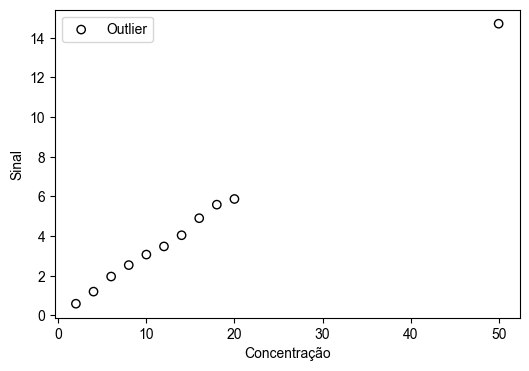

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

## Leverage

$$ h_{ii} = \frac{1}{n} + \frac{\left(x_{i} - \overline{x} \right)^{2}}{\sum_{i=1}^{n} \left(x_{i} - \overline{x} \right)^{2}}$$

onde:
- $n$ é o número total de amostras;
- $x_{i}$ é a i-ésima observação da amostra;
- $\overline{x}$ é a média da amostra;

$$critico = \frac{fator\times n_{p}}{n}$$

onde:
- $n$ é o número total de amostras;
- $n_{p}$ é o número de parâmetros estimados pelo modelo, incluíndo o intercepto (e.g. $n_{p}=2$;
- $fator$ é o fator de penalização ($2$ (moderado) ou  $3$ (extremo));

In [6]:
df["Alavancagem"] = functions.leverage(df[nome_conc])

In [7]:
functions.check_leverage(df["Alavancagem"], df["Ensaio"], critical=3, n_param=2)

A alavancagem (0.825) do ensaio "Ensaio 11" esta acima do limite esperado (0.5454545454545454)


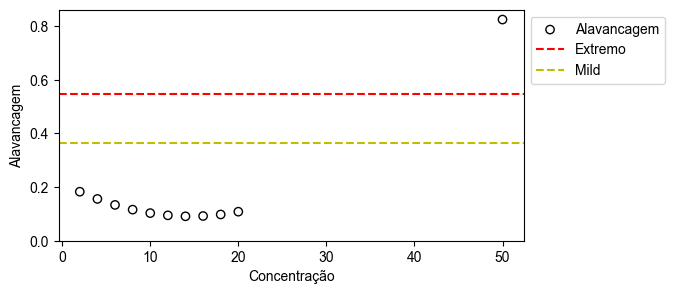

In [8]:
functions.make_leverage_plot(df[nome_conc], df["Alavancagem"])

## Regressão linear com SciPy

In [9]:
reg_linear = stats.linregress(df[nome_conc], df[nome_sinal])

### Coeficiente angular ( $b_{1}$ )

$$b_{1} = \frac{\sum_{i=1}^{n}(x_{i} - \overline{x})(y_{i} - \overline{y})}{\sum_{i=1}^{n}(x_{i} - \overline{x})^{2}}$$

onde:
- $n$ é o número total de observações;
- $y_{i}$ é o valor do sinal para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;
- $x_{i}$ é o valor da concentração para a i-ésima observação;
- $\overline{x}$ é a média das concentrações;

> Tem unidade do sinal vezes o inverso da unidade da concentração

In [10]:
b1 = reg_linear[0]
b1

0.29277332092462843

### Coeficiente linear ( $b_{0}$ )

$$b_{0} = \frac{\sum_{i=1}^{n} (y_{i}) - b_{1} \times \sum_{i=1}^{n} (x_{i}) }{n}$$

onde:
- $n$ é o número total de observações;
- $b_{1}$ é o coeficiente angular;
- $y_{i}$ é o valor do sinal para a i-ésima observação;
- $x_{i}$ é o valor da concentração para a i-ésima observação;

> Tem unidade do sinal

In [11]:
b0 = reg_linear[1]
b0

0.10294725927813175

### Equação da reta 

$$sinal = b_{0} + concentração \times b_{1}$$

onde:
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;

In [12]:
f"sinal = {b0} + concentração x {b1}"

'sinal = 0.10294725927813175 + concentração x 0.29277332092462843'

### Predição valores pontuais

In [13]:
df["ypred"] = b1*df[nome_conc] + b0
df

,Concentração,Sinal,Ordem de coleta,Ensaio,Alavancagem,ypred
0,2,0.593057,1,Ensaio 1,0.182803,0.688494
1,4,1.203115,2,Ensaio 2,0.155839,1.274041
2,6,1.964288,3,Ensaio 3,0.133546,1.859587
3,8,2.540861,4,Ensaio 4,0.115924,2.445134
4,10,3.071079,5,Ensaio 5,0.102972,3.030680
5,12,3.481384,6,Ensaio 6,0.094692,3.616227
6,14,4.045735,7,Ensaio 7,0.091083,4.201774
7,16,4.904917,8,Ensaio 8,0.092144,4.787320
8,18,5.588038,9,Ensaio 9,0.097877,5.372867
9,20,5.873677,10,Ensaio 10,0.108280,5.958414


### Plotando o gráfico de regressão

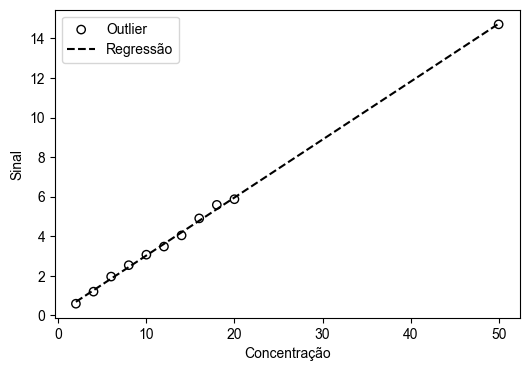

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
plt.plot(df[nome_conc], df['ypred'], label="Regressão", c='k', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

## ANOVA

### Somatório dos quadrados TOTAIS ( $SQT$ )

$$ SQT = \sum_{i=1}^{n} (y_{i} - \overline{y})^{2}$$

onde:
- $n$ é o número total de observações;
- $y_{i}$ é o valor do sinal para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;

> Tem a unidade do sinal ao quadrado

In [15]:
df['sqt'] = np.square(df[nome_sinal] - df[nome_sinal].mean())

In [16]:
SQT = df['sqt'].sum()
SQT

146.95523809127315

### Grau de liberdade dos quadrados totais ( $gl_{totais}$ )

$$gl_{totais} = n - 1$$

onde:
- $n$ é o número total de observações;

In [17]:
gl_total = df.shape[0] - 1
gl_total

10

### Média dos quadrados totais ( $MSQT$ )

$$ MSQT = \frac{SQT}{gl_{totais}}$$

onde:
- $SQT$ é o somatório quadrático da diferença entre cada sinal e a média dos sinais;
- $gl_{totais}$ é o grau de liberdade associado aos $SQT$;

> Tem a unidade do sinal ao quadrado

In [18]:
MSQT = SQT/gl_total
MSQT

14.695523809127314

### Somatório dos quadrados da REGRESSÃO ( $SQR$ )

$$ SQR = \sum_{i=1}^{n} (\widehat{y_{i}} - \overline{y})^{2}$$


onde:
- $n$ é o número total de observações;
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;

> Tem a unidade do sinal ao quadrado

In [19]:
df['sqr'] = np.square(df["ypred"] - df[nome_sinal].mean())

In [20]:
SQR = df['sqr'].sum()
SQR

146.808503333476

### Grau de liberdade da regressão ( $gl_{regressão}$ )

$$gl_{regressão} = 1 $$

In [21]:
gl_reg = 1
gl_reg

1

### Média da soma dos quadrados da regressão ( $MSQR$ )

$$MSQR = \frac{SQR}{gl_{regressão}}$$

onde:
- $SQR$ é o somatório quadrático da diferença entre cada sinal predito e a média dos sinais;
- $gl_{regressão}$ é o grau de liberdade assiciado a regressão;

In [22]:
MSQR = SQR/gl_reg
MSQR

146.808503333476

### Somatório dos quadrados dos ERROS ( $SQE$ )

$$SQE = \sum_{i=1}^{n} (\widehat{y_{i}} - y_{i})^{2}$$

onde:
- $n$ é o número total de observações;
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $y_{i}$ é o valor do sinal para a i-ésima observação;

> Tem a unidade do sinal ao quadrado

In [23]:
df['sqe'] = np.square(df["ypred"] - df[nome_sinal])

In [24]:
SQE = df['sqe'].sum()
SQE

0.14673475779706968

### Grau de liberdade dos erros ( $gl_{erros}$ )

$$gl_{erros} = n - 2$$

onde:
- $n$ é o número total de observações;

In [25]:
gl_erro = df.shape[0] - 2
gl_erro

9

### Média da soma dos quadrados dos erros ( $MSQE$ )

$$MSQE = \frac{SQE}{gl_{erros}}$$

onde:
- $SQE$ é o somatório quadrático da diferença entre cada sinal e respectivo sinal predito;
- $gl_{erros}$ é o grau de liberdade assiciado aos erros;

> Tem a unidade do sinal ao quadrado

In [26]:
MSQE = SQE/gl_erro
MSQE

0.016303861977452188

### Estatística do teste ( $F_{calculado}$ )

$$ F_{calculado} = \frac{MSQR}{MSQE}$$

onde:
- $MSQR$ é a quantidade média de variância que o modelo consegue explicar;
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;



In [27]:
Fcalc = MSQR/MSQE
Fcalc

9004.52319435164

### Valor crítico ( $F_{critico}$ )

$$F_{crítico} = F_{1-\alpha, gl_{regressão}, gl{erros}}$$

onde:
- $\alpha$ é o nível de significância adotado;
- $gl_{regressão}$ é o grau de liberdade assiciado a regressão;
- $gl_{erros}$ é o grau de liberdade assiciado aos erros;

> Utiliza-se a distribuição F unilateral

In [28]:
Ftab = stats.f.ppf(1-alfa, gl_reg, gl_erro)
Ftab

5.117355029199227

### p-valor ( $p-valor$ ) 

In [29]:
p_valor = 1- stats.f.cdf(Fcalc, gl_reg, gl_erro)
p_valor

8.104628079763643e-15

### Conclusão do teste

Hipóteses do teste:

$$H_{0}: \beta_{1} = 0$$

$$H_{1}: \beta_{1} \neq 0$$

#### Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***não é significativa***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***é significativa***);


#### Utilizando o valor crítico

- Se $F_{crítico} \geq F_{calculado}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***não é significativa***);
- Se $F_{crítico} < F_{calculado}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***é significativa***);

In [30]:
if p_valor < alfa:
    anova_significativo = "Sim"
else:
    anova_significativo = "Não"
    
f"A regressão é significativa? {anova_significativo}"

'A regressão é significativa? Sim'

### Verificações

#### Somatório dos quadrados

$$ SQT = SQR + SQE$$

In [31]:
SQT == SQR + SQE

False

#### Graus de liberdade

$$ gl_{total} = gl_{regressão} + gl_{erros}$$

In [32]:
gl_total == gl_reg + gl_erro

True

### Tabela de ANOVA

In [33]:
df_anova = pd.DataFrame({
    "Fonte de Variação": ["Regressão", "Resíduos", "Total"],
    "Somatório": [SQR, SQE, SQT],
    "gl": [gl_reg, gl_erro, gl_total],
    "Médias": [MSQR, MSQE, MSQT],
    "F calculado": [Fcalc, "", ""],
    "F tabelado": [Ftab, "", ""],
    "p-valor": [p_valor, "", ""],
    "Singnificativo?": [anova_significativo, "", ""]
})
df_anova

,Fonte de Variação,Somatório,gl,Médias,F calculado,F tabelado,p-valor,Singnificativo?
0,Regressão,146.808503,1,146.808503,9004.523194,5.117355,0.0,Sim
1,Resíduos,0.146735,9,0.016304,,,,
2,Total,146.955238,10,14.695524,,,,


### Gráfico da distribuição F

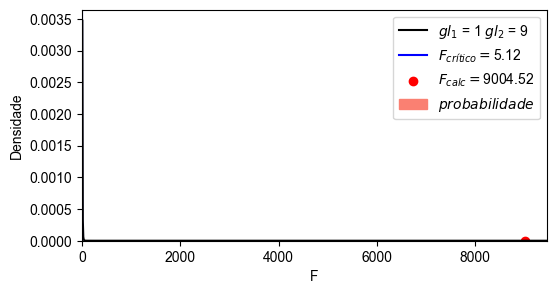

In [34]:
functions.make_f_distribution_plot(Fcalc, gl_reg, gl_erro, alpha=alfa)

## Coeficiente de determinação ( $R^{2}$ )

$$R^{2} = \frac{SQR}{SQT}$$

onde:
- $SQR$ é o somatório quadrático da diferença entre cada sinal predito e a média dos sinais;
- $SQT$ é o somatório quadrático da diferença entre cada sinal e a média dos sinais;


$$R^{2} = \frac{\sum_{i=1}^{n} (\widehat{y_{i}} - \overline{y})^{2}}{\sum_{i=1}^{n} (y_{i} - \overline{y})^{2}}$$

onde:
- $n$ é o número total de observações;
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;
- $y_{i}$ é o valor do sinal para a i-ésima observação;


In [35]:
R2 = SQR/SQT
R2

0.999001500322799

### Coeficiente de determinação ajustado ( $R_{ajustado}^{2}$ )

$$R_{ajustado}^{2} = 1 - \frac{MSQE}{MSQT}$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $MSQT$ é a média de toda a variância;

In [36]:
R2ajustado = 1 - MSQE/MSQT
R2ajustado

0.9988905559142216

## Diagnóstico do modelo

### Resíduos ( $resíduos$ )

$$ resíduos = y_{i} - \widehat{y_{i}}$$

onde:
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;


In [37]:
df['Resíduos'] = df[nome_sinal] - df['ypred']

### Média dos resíduos igual a zero (teste t de Student pareado)

$$t_{calc} = \frac{(\overline{resíduos} - \mu_{0}) \times \sqrt{n}}{s_{resíduos}}$$


onde:
- $n$ é o número total de observações;
- $\overline{resíduos}$ é a média dos resíduos;
- $\mu_{0}$ é o valor esperado para os resíduos, ( e.g., $\mu_{0}=0$ );
- $s_{resíduos}$ é o desvio padrão dos resíduos ( $\sqrt{MSQE}$ );

#### Conclusão do teste

Hipóteses do teste:

$$H_{0}: \overline{resíduos} = \mu_{0} = 0$$

$$H_{1}: \overline{resíduos} \neq \mu_{0} \neq 0$$


##### Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a média dos resíduos é ***diferente de zero***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão média dos resíduos é ***igual a zero***);


##### Utilizando o valor crítico

- Se $t_{crítico} \geq t_{calculado}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a média dos resíduos é ***diferente de zero***);
- Se $t_{crítico} < t_{calculado}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão média dos resíduos é ***igual a zero***);

O valor crítico do teste é obtido da distribuição t de Student bilateral com $gl_{erros}$.

In [38]:
print(f"Os resídos tem média = {df['Resíduos'].mean()} e desvio padrão = {np.sqrt(MSQE)}")

Os resídos tem média = 3.431598439750484e-16 e desvio padrão = 0.12768657712325202


In [39]:
paired_t_test_mean = df['Resíduos'].mean()/(np.sqrt(MSQE)/np.sqrt(df.shape[0]))
paired_t_test_mean

8.913485436167121e-15

In [40]:
paired_t_test_mean_p = (1 - stats.t.cdf(np.abs(paired_t_test_mean), gl_erro))*2
paired_t_test_mean_p

0.9999999999999931

In [41]:
if paired_t_test_mean_p < alfa:
    print(f"A média dos resíduos é diferente de 0 (p-valor = {round(paired_t_test_mean_p, 2)})")
else:
    print(f"A média dos resíduos é igual a 0 (p-valor = {round(paired_t_test_mean_p, 2)})")

A média dos resíduos é igual a 0 (p-valor = 1.0)


In [42]:
t_critico = stats.t.ppf(1-alfa/2, gl_erro)
t_critico

2.2621571627409915

#### Gráfico da distribuição t de Student para a média dos resíduos

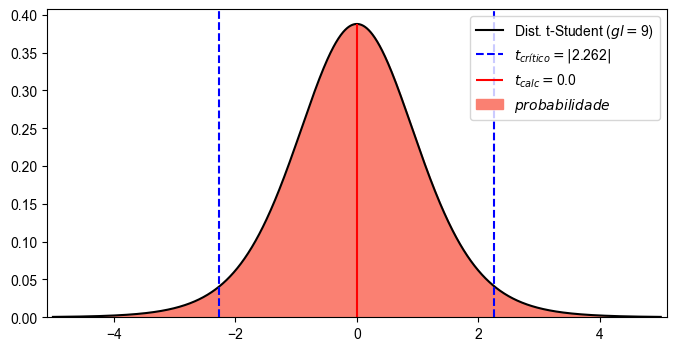

In [43]:
functions.make_t_distribution_plot(t_calc=paired_t_test_mean, gl=gl_erro, alpha=alfa)

### Resíduos apresentam distribuição Normal ( Shapiro-Wilk )


#### Conclusão do teste

Hipóteses do teste:

$$H_{0}: Os \; resíduos \; apresentam \; distribuição \; Normal$$

$$H_{1}: Os \; resíduos \; não \; apresentam \; distribuição \; Normal$$


##### Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (os resíduos ***não apresentam distribuição Normal***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (os resíduos ***apresentam distribuição Normal***);


In [44]:
norm_test_stats, norm_test_p_value = stats.shapiro(df['Resíduos'])

In [45]:
if norm_test_p_value < alfa:
    print(f"Os resíduos não apresentam distribuição Normal (p_valor = {round(norm_test_p_value, 3)})")
else:
    print(f"Os resíduos apresentam distribuição Normal (p_valor = {round(norm_test_p_value, 3)})")

Os resíduos apresentam distribuição Normal (p_valor = 0.465)


### Independência dos resíduos em relação à ordem de coleta


#### Gráfico dos resíduos *versus* ordem de coleta

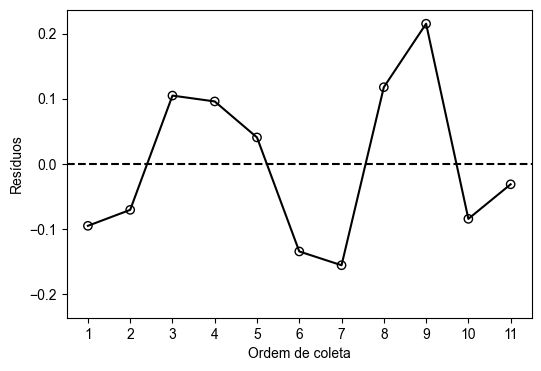

In [46]:
functions.make_residuals_plot_acquisition_order(df["Resíduos"], aquisition_order=df["Ordem de coleta"])

### Independência dos resíduos em relação ao ajustamento

#### Gráfico dos resíduos *versus* sinal predito

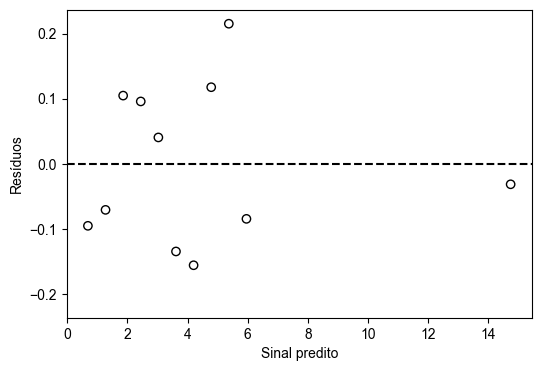

In [47]:
functions.make_independent_residuals_plot(residuals=df["Resíduos"], predicted=df["ypred"])

### Outliers (Resíduos padronizados)

$$resíduo \; padronizado_{i} = \frac{resíduo_{i}}{\sqrt{MSQE}}$$

onde:
- $resíduo_{i}$ é o resíduo da i-ésima observação;
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;


#### Conclusão

> Se $|resíduo \; padronizado_{i}| > 3$, a i-ésima observação é um possível outlier

In [48]:
df['Resíduos Padronizados'] = functions.standardized_residuals(df['Resíduos'], MSQE)

In [49]:
functions.check_standardized_residuals(df['Resíduos Padronizados'], df["Ensaio"], limite=2)

Nenhum resíduo padronizado é maior do que 2.


In [50]:
functions.check_standardized_residuals(df['Resíduos Padronizados'], df["Ensaio"], limite=3)

Nenhum resíduo padronizado é maior do que 3.


#### Gráfico dos resíduos padronizados *versus* sinal predito

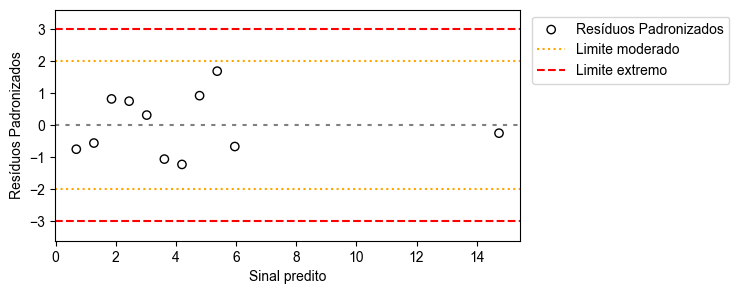

In [51]:
functions.make_standardized_residuals(df["Resíduos Padronizados"], df["ypred"])

#### Resíduos studentizados


$$resíduo \; student_{i} = \frac{resíduo_{i}}{\sqrt{MSQE \times \left(1 - h_{ii} \right)}}$$

onde:
- $resíduo_{i}$ é o resíduo da i-ésima observação;
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $h_{ii}$ é a alavancagem da i-ésima observação;


#### Conclusão

> Se $|resíduo \; student_{i}| > 3 $, a i-ésima observação é um possível outlier extremo

> Se $|resíduo \; student_{i}| > 2 $, a i-ésima observação é um possível outlier moderado

In [52]:
df['Resíduos Studentizados'] = functions.studentized_residuals(df["Resíduos"], MSQE, df["Alavancagem"])

In [53]:
functions.check_studentized_residuals(df['Resíduos Studentizados'], df['Ensaio'])     

Nenhum resíduo studentizado é maior do que 2.


In [54]:
functions.check_studentized_residuals(df['Resíduos Studentizados'], df['Ensaio'], limite=3)     

Nenhum resíduo studentizado é maior do que 3.


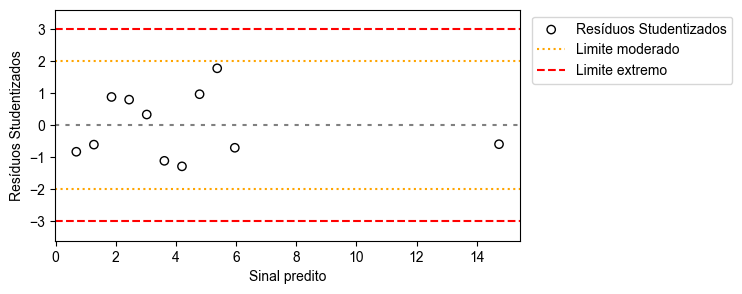

In [55]:
functions.make_studentized_residuals_plot(df['Resíduos Studentizados'], df['ypred'])

#### Resíduos studentizados excluído (ou studentizados externamente)

$$t_{i} = \frac{resíduo_{i}}{\sqrt{MSQE_{i} \times \left(1- h_{ii} \right)}}$$

onde:
- $resíduo_{i}$ é o resíduo da i-ésima observação;
- $h_{ii}$ é a alavancagem da i-ésima observação;
- $MSQE_{i}$ é a média da soma dos quadrados dos erros obtida *excluindo* a i-ésima observação;


$$t_{i} = res \; student_{i} \left( \frac{n - n_{p} - 1}{n - n_{p} - res \; student_{i}^{2}} \right)^{2}$$

onde:
- $res \; student_{i}$ é o resíduo studentizado da i-ésima observação;
- $n$ é o número total de observações;
- $n_{p}$ é o número de parâmetros do modelo, incluindo o intercepto ( e.g. $n_{p}=2$ );


In [56]:
df["Resíduos studentizados deletados"] = functions.deleted_t_residuals(df["Resíduos"], df["Alavancagem"], MSQE)

In [57]:
functions.check_deleted_t_residuals(df["Resíduos studentizados deletados"], df["Ensaio"])

Nenhum resíduo studentizado é maior do que 2.3060041350333704.


(2.3060041350333704,
 [0.44085916754568477,
  0.5766401005501138,
  0.41024612000730176,
  0.45796245693757043,
  0.7594151195270544,
  0.2926685358802603,
  0.218097248475001,
  0.3639166173935666,
  0.07173713461859377,
  0.5147713169609607,
  0.585030110973888])

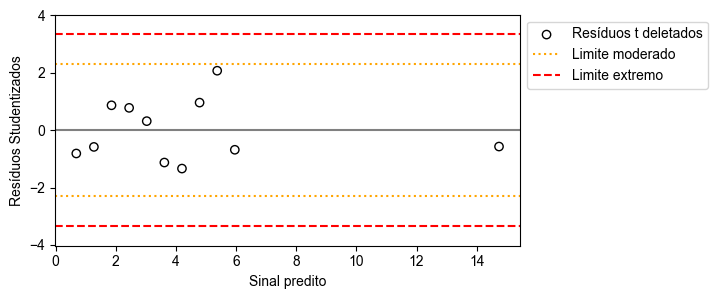

In [58]:
functions.make_deleted_t_residuals(df["Resíduos studentizados deletados"], df["ypred"], n_param=2, alpha_mild=0.05, alpha_extreme=0.01)

In [59]:
df["Cook"] = functions.cook_distance(df["Resíduos Studentizados"], df["Alavancagem"])

In [60]:
functions.check_cooks_distance(df["Cook"], df["Ensaio"], influential=1)

Nenhuma amostra foi considerada influente (1).


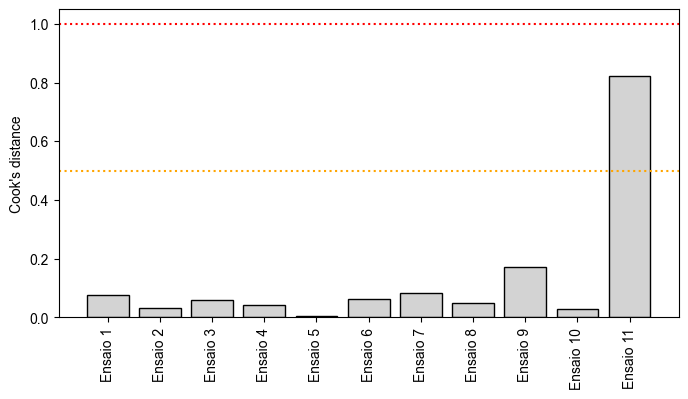

In [61]:
functions.make_cook_distance_plot(df["Cook"], df["Ensaio"], influential_mild=0.5, influential_extreme=1.0)

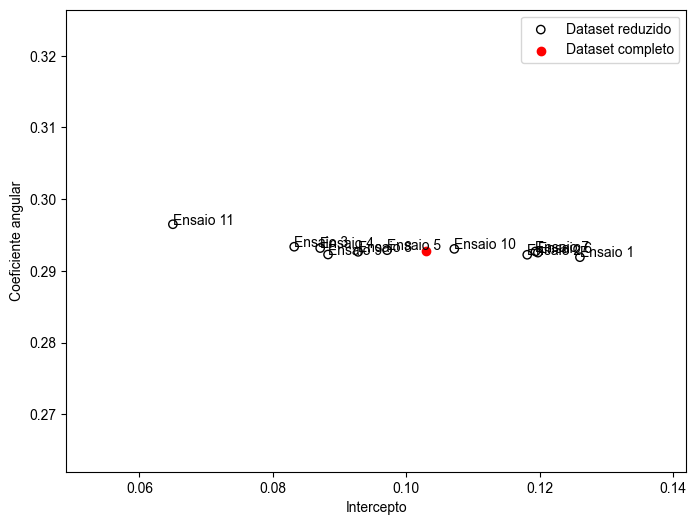

In [62]:
functions.make_slopes_versus_intercepts_plot(df[nome_conc], df[nome_sinal], df["Ensaio"])

In [63]:
df_data = df[[nome_conc, nome_sinal]].copy()
df_parameters = functions.fit(df_data, alpha=alfa)


df_parameters

0.016303861977452188
1712.7272727272727
O coeficiente angular (0.293) é diferente de zero (p-valor = 0.0)
O coeficiente linear (0.103) é igual a zero (p-valor = 0.0)


,Parâmetros,Valor,Desvio padrão,Intervalo confiança (95.0%),Estatística,t-crítico,p-valor,Significativo?
0,Coeficiente angular,0.292773,0.003085,0.006979,94.892166,2.262157,7.993606e-15,Sim
1,Intercepto,0.102947,0.059128,0.133758,1.741082,2.262157,1.156543e-01,Não


### Correlação dos resíduos ( $r_{pearson}$ )



$$r_{pearson} = \frac{\sum_{i=1}^n (y_i - \overline{y}) (\widehat{y_{i}} - \overline{\widehat{y}})}{\sqrt{\sum_{i=1}^n ((y_i - \overline{y})^2 \sum_{i=1}^n ((\widehat{y_{i}} - \overline{\widehat{y}})^2}}$$

onde
- $n$ é o número total de observações;
- $y_i$ é a i-ésima observação do sinal;
- $\overline{y}$ é a média do sinal;
- $\widehat{y_{i}}$ é a i-ésima observação do sinal predito;
- $\overline{\widehat{y}}$ é a média do sinal predito;


In [64]:
residual_r_pearson, _ = stats.pearsonr(df[nome_sinal], df['ypred'])

In [65]:
if residual_r_pearson > 0.90:
    print(f"A correlação entre o sinal experimental e o sinal predito é forte (r_pearson = {round(residual_r_pearson, 2)})")
else:
    print(f"A correlação entre o sinal experimentais e o sinal predito NÃO é forte (r_pearson = {round(residual_r_pearson, 2)})")

A correlação entre o sinal experimental e o sinal predito é forte (r_pearson = 1.0)


#### Gráfico do sinal predito *versus* sinal real

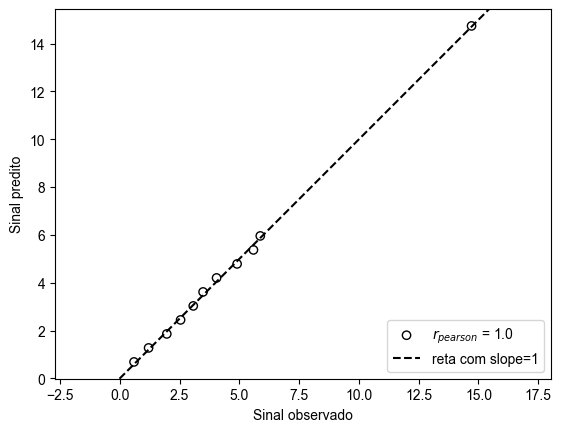

In [66]:
# obtendo o limite inferior para o eixo x
if df[nome_sinal].min() > df['ypred'].min():
    x_min = df['ypred'].min()
else:
    x_min = df[nome_sinal].min()

# obtendo o limite inferior para o eixo y    
if df[nome_sinal].max() > df['ypred'].max():
    x_max = df[nome_sinal].max()
else:
    x_max = df['ypred'].max()  
    
x_max = x_max + 0.2*x_min
x_min = x_min - 0.2*x_min

# criando o canvas
plt.figure()
# adicionando os resíduos
text = "$r_{pearson}$" + f" = {round(residual_r_pearson, 2)}"
plt.scatter(df[nome_sinal], df['ypred'], edgecolors='k', facecolor='None', label=text)
# adicionando reta com slope = 1
plt.axline(xy1=(df[nome_sinal].mean(), df[nome_sinal].mean()), slope=1, color="black", linestyle="--", label="reta com slope=1")
plt.xlim(x_min, x_max)
plt.ylim(x_min, x_max)
plt.xlabel("Sinal observado")
plt.ylabel("Sinal predito")
plt.legend(loc=4)
plt.axis('equal')
plt.show()

## Intervalo de confiança dos parâmetros

### Coeficiente angular ( $b_{1}$ )


#### Desvio padrão

$$s_{b_{1}} = \sqrt{\frac{MSQE}{S_{xx}}}$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração, que é estimado por:

$$S_{xx} = \sum_{i=1}^{n} (x_{i} - \overline{x})^2$$

onde:
- $n$ é o número total de observações;
- $x_i$ é a i-ésima observação da concentração;
- $\overline{x}$ é a média da concentração;

> O $S_{xx}$ tem unidade da concentração ao quadrado

> O $s_{b_{1}}$ tem unidade do sinal divido pelo sinal da concentração

In [67]:
df['sxx'] = np.square(df[nome_conc] - df[nome_conc].mean())
Sxx = np.sum(df['sxx'])
Sxx

1712.7272727272727

In [68]:

b1_std = np.sqrt(MSQE/Sxx)
b1_std

0.0030853265642499764

#### Intervalo de confiança ( $IC_{b_{1}}$ )

$$ IC_{b_{1}} = t_{gl_{erros}, 1-\alpha/2} \times s_{b_{1}}$$

onde:
- $t_{gl_{erros}, 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;
- $s_{b_{1}}$ é o desvio padrão do coeficiente angular

> Tem unidade do sinal divido pelo sinal da concentração

In [69]:
ic_b1 = t_critico*b1_std
ic_b1

0.006979493586713138

#### Valor verdadeiro

O valor verdadeiro de $b_{1}$ esta dentro do intervalo:

$$b_{1} - IC_{b_{1}} \leq b_{1} \leq b_{1} + IC_{b_{1}}$$


In [70]:
f"{round(b1 - ic_b1, 4)} ≤ b1 ≤  {round(b1 + ic_b1, 4)}" 

'0.2858 ≤ b1 ≤  0.2998'

#### Teste de hipótese

A estatística do teste é:

$$t_{b_{1}} = \frac{b_{1}}{s_{b_{1}}}$$

onde:
- $b_{1}$ é o coeficiente angular;
- $s_{b_{1}}$ é o desvio padrão do coeficiente angular;


Hipótese:

$$H_{0}: \beta_{1} = 0$$
$$H_{1}: \beta_{1} \neq 0$$


##### Conclusão Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***diferente de zero***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***igual a zero***);


##### Utilizando o valor crítico

- Se $t_{crítico} \geq t_{b_{1}}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***diferente de zero***);
- Se $t_{crítico} < t_{b_{1}}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***igual a zero***);

O valor crítico do teste é obtido da distribuição t de Student bilateral com $gl_{erros}$.

In [71]:
t_b1 = b1/b1_std
t_b1

94.8921661379465

In [72]:
p_valor_b1 = (1 - stats.t.cdf(t_b1, gl_erro))*2
p_valor_b1

7.993605777301127e-15

In [73]:
if p_valor_b1 < alfa:
    b1_significante = "Sim"
    print(f"O coeficiente angular ({round(b1, 3)}) é diferente de zero (p-valor = {round(p_valor_b1, 3)})")
else:
    b1_significante = "Não"
    print(f"O coeficiente angular ({round(b1, 3)}) é igual a zero (p-valor = {round(p_valor_b1, 3)})")


O coeficiente angular (0.293) é diferente de zero (p-valor = 0.0)


##### Gráfico da distribuição t de Student para o $b_{1}$

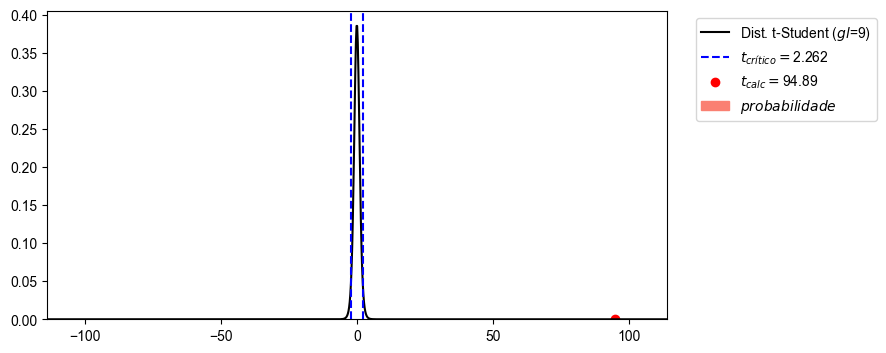

In [74]:
# obtendo intervalo de x para plotar o gráfico
if t_critico > np.abs(t_b1):
    x_aux = 5
else:
    x_aux = np.abs(t_b1) + 0.2*np.abs(t_b1)


# criando o canvas
fig, ax1 = plt.subplots(figsize=(8,4))

# adicionando a distribuição t de Student
x = np.linspace(-1*x_aux, x_aux, 1000)
y = stats.t.pdf(x, gl_erro, loc=0, scale=1)
label = "Dist. t-Student ($gl$=" + str(gl_erro) + ")"
ax1.plot(x, y, c="k", label=label)

label = '$t_{crítico} = $' + str(round(t_critico, 3))
ax1.axvline(t_critico, 0, 1, label=label, color='blue', ls='--')
ax1.axvline(-t_critico, 0, 1, color='blue', ls='--')

label = '$t_{calc} = $' + str(round(t_b1, 2))
ax1.scatter(t_b1, 0, color='red', label=label)

x = np.linspace(-1*x_aux, -1*np.abs(t_b1), 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), label = '$probabilidade$', color = 'salmon')

x = np.linspace(np.abs(t_b1), x_aux, 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), color = 'salmon')

plt.xlim(-1*x_aux - 0.1, x_aux + 0.1)
plt.ylim(bottom=0.0)
plt.legend(bbox_to_anchor=(1.35,1))
plt.show()

### Coeficiente linear ( $b_{0}$ )


#### Desvio padrão

$$s_{b_{0}} = \sqrt{MSQE \left( \frac{1}{n} + \frac{\overline{x}^{2}}{S_{xx}} \right)}$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração
- $n$ é o número total de observações;
- $\overline{x}$ é a média da concentração;



> O $s_{b_{0}}$ tem unidade do sinal

In [75]:
b0_std = np.sqrt(MSQE*(1/df.shape[0] + df[nome_conc].mean()**2/Sxx))
b0_std

0.05912831165631457

#### Intervalo de confiança ( $IC_{b_{0}}$ )

$$ IC_{b_{0}} = t_{gl_{erros}, 1-\alpha/2} \times s_{b_{0}}$$

onde:
- $t_{gl_{erros}, 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;
- $s_{b_{0}}$ é o desvio padrão do coeficiente angular

> Tem unidade do sinal

In [76]:
ic_b0 = b0_std*t_critico
ic_b0

0.13375753373411367

#### Valor verdadeiro

O valor verdadeiro de $b_{0}$ esta dentro do intervalo:

$$b_{0} - IC_{b_{0}} \leq b_{0} \leq b_{0} + IC_{b_{0}}$$

In [77]:
f"{round(b0 - ic_b0, 4)} ≤ b0 ≤  {round(b0 + ic_b0, 4)}" 

'-0.0308 ≤ b0 ≤  0.2367'

#### Teste de hipótese

A estatística do teste é:

$$t_{b_{0}} = \frac{b_{0}}{s_{b_{0}}}$$

onde:
- $b_{0}$ é o coeficiente linear;
- $s_{b_{0}}$ é o desvio padrão do coeficiente linear;


Hipótese:

$$H_{0}: \beta_{0} = 0$$
$$H_{1}: \beta_{0} \neq 0$$


##### Conclusão Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***diferente de zero***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***igual a zero***);


##### Utilizando o valor crítico

- Se $t_{crítico} \geq t_{b_{1}}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***diferente de zero***);
- Se $t_{crítico} < t_{b_{1}}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***igual a zero***);

O valor crítico do teste é obtido da distribuição t de Student bilateral com $gl_{erros}$.

In [78]:
t_b0 = b0/b0_std
t_b0

1.7410823410030103

In [79]:
p_valor_b0 = (1 - stats.t.cdf(t_b0, gl_erro))*2
p_valor_b0

0.11565431421244599

In [80]:
if p_valor_b0 < alfa:
    b0_significante = "Sim"
    print(f"O coeficiente linear ({round(b0, 3)}) é diferente de zero (p-valor = {round(p_valor_b0, 3)})")
else:
    b0_significante = "Não"
    print(f"O coeficiente linear ({round(b0, 3)}) é igual a zero (p-valor = {round(p_valor_b1, 0)})")


O coeficiente linear (0.103) é igual a zero (p-valor = 0.0)


##### Gráfico da distribuição t de Student para o $b_{0}$

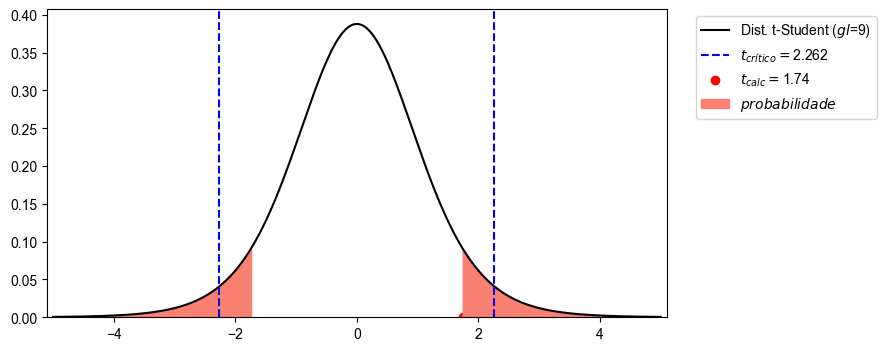

In [81]:
# obtendo intervalo de x para plotar o gráfico
if t_critico > np.abs(t_b0):
    x_aux = 5
else:
    x_aux = np.abs(t_b0) + 0.2*np.abs(t_b0)


# criando o canvas
fig, ax1 = plt.subplots(figsize=(8,4))

# adicionando a distribuição t de Student
x = np.linspace(-1*x_aux, x_aux, 1000)
y = stats.t.pdf(x, gl_erro, loc=0, scale=1)
label = "Dist. t-Student ($gl$=" + str(gl_erro) + ")"
ax1.plot(x, y, c="k", label=label)

label = '$t_{crítico} = $' + str(round(t_critico, 3))
ax1.axvline(t_critico, 0, 1, label=label, color='blue', ls='--')
ax1.axvline(-t_critico, 0, 1, color='blue', ls='--')

label = '$t_{calc} = $' + str(round(t_b0, 2))
ax1.scatter(t_b0, 0, color='red', label=label)

x = np.linspace(-1*x_aux, -1*np.abs(t_b0), 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), label = '$probabilidade$', color = 'salmon')

x = np.linspace(np.abs(t_b0), x_aux, 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), color = 'salmon')

plt.xlim(-1*x_aux - 0.1, x_aux + 0.1)
plt.ylim(bottom=0.0)
plt.legend(bbox_to_anchor=(1.35,1))
plt.show()

## Intervalo de confiança do sinal predito

### Valores médios

Valores preditos pelo modelo podem ser obtidos através da relação:

$$\widehat{y_{interesse}} = b_{0} + b_{1} \times x_{interesse}$$

onde:
- $\widehat{y_{imteresse}}$ é o sinal predito;
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;
- $x_{interesse}$ é uma concentração utilizada para confeccionar o modelo;


#### Desvio padrão

$$s_{x_{interesse}} = \sqrt{MSQE \left(\frac{1}{n} + \frac{\left( x_{interesse} - \overline{x} \right)^{2} }{S_{xx}} \right) }$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração
- $n$ é o número total de observações;
- $\overline{x}$ é a média da concentração;
- $x_{interesse}$ é uma concentração utilizada para confeccionar o modelo;

#### Intervalo de confiança

$$IC \left( \widehat{y_{interesse}} \right) = t_{gl_{erros}, \; 1-\alpha/2} \times s_{x_{interesse}} $$

onde:
- $s_{x_{interesse}}$ é o desvio padrão de $\widehat{y_{interesse}}$;
- $t_{gl_{erros}, \; 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;

In [82]:
# criando um novo dataframe com apenas informações relevantes para a predição
df_pred = df[[nome_conc, nome_sinal, 'ypred']].copy()

In [83]:
df_pred["Médios IC"] = t_critico*np.sqrt(MSQE*(1/df.shape[0] + np.square(df_pred[nome_conc] - df[nome_conc].mean())/Sxx))
df_pred["Médios L. Inferior"] = df_pred['ypred'] -  df_pred["Médios IC"]
df_pred["Médios L. Superior"] = df_pred['ypred'] +  df_pred["Médios IC"]
df_pred

,Concentração,Sinal,ypred,Médios IC,Médios L. Inferior,Médios L. Superior
0,2,0.593057,0.688494,0.123498,0.564996,0.811992
1,4,1.203115,1.274041,0.114026,1.160014,1.388067
2,6,1.964288,1.859587,0.105556,1.754031,1.965143
3,8,2.540861,2.445134,0.098345,2.346788,2.543479
4,10,3.071079,3.030680,0.092689,2.937991,3.123370
5,12,3.481384,3.616227,0.088884,3.527343,3.705111
6,14,4.045735,4.201774,0.087174,4.114600,4.288948
7,16,4.904917,4.787320,0.087680,4.699640,4.875001
8,18,5.588038,5.372867,0.090367,5.282500,5.463234
9,20,5.873677,5.958414,0.095048,5.863366,6.053462


#### Gráfico de calibração com as bandas médias

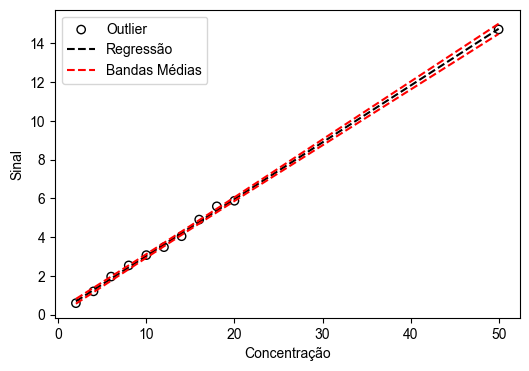

In [84]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os valores experimentais (do df original)
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
# adicionando a linha de regressão (df pred)
plt.plot(df_pred[nome_conc], df_pred['ypred'], label="Regressão", c='k', ls='--')
# adicionando banda média inferior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Inferior'], c='r', ls='--', label="Bandas Médias")
# adicionando banda média superior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Superior'], c='r', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

### Valores pontuais

Valores preditos pelo modelo podem ser obtidos através da relação:

$$\widehat{y_{interesse}} = b_{0} + b_{1} \times x_{interesse}$$

onde:
- $\widehat{y_{imteresse}}$ é o sinal predito;
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;
- $x_{interesse}$ é uma concentração qualquer, dentro do intervalo de concentração utilizado para confeccionar o modelo;


#### Desvio padrão

$$s_{x_{interesse}} = \sqrt{MSQE \left(\frac{1}{m} + \frac{1}{n} + \frac{\left( x_{interesse} - \overline{x} \right)^{2} }{S_{xx}} \right) }$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração
- $n$ é o número total de observações;
- $m$ é o número de repetições obtidos para $x_{interesse}$;
- $\overline{x}$ é a média da concentração;
- $x_{interesse}$ é uma concentração qualquer, dentro do intervalo de concentração utilizado para confeccionar o modelo;

#### Intervalo de confiança

$$IC \left( \widehat{y_{interesse}} \right) = t_{gl_{erros}, \; 1-\alpha/2} \times s_{x_{interesse}} $$

onde:
- $s_{x_{interesse}}$ é o desvio padrão de $\widehat{y_{interesse}}$;
- $t_{gl_{erros}, \; 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;

In [85]:
df_pred["Individuais IC"] = t_critico*np.sqrt(MSQE*(1 + 1/df.shape[0] + np.square(df_pred[nome_conc] - df[nome_conc].mean())/Sxx))
df_pred["Individuais L. Inferior"] = df_pred['ypred'] -  df_pred["Individuais IC"]
df_pred["Individuais L. Superior"] = df_pred['ypred'] +  df_pred["Individuais IC"]
df_pred

,Concentração,Sinal,ypred,Médios IC,Médios L. Inferior,Médios L. Superior,Individuais IC,Individuais L. Inferior,Individuais L. Superior
0,2,0.593057,0.688494,0.123498,0.564996,0.811992,0.314141,0.374353,1.002635
1,4,1.203115,1.274041,0.114026,1.160014,1.388067,0.310539,0.963501,1.584580
2,6,1.964288,1.859587,0.105556,1.754031,1.965143,0.307530,1.552057,2.167117
3,8,2.540861,2.445134,0.098345,2.346788,2.543479,0.305130,2.140004,2.750264
4,10,3.071079,3.030680,0.092689,2.937991,3.123370,0.303354,2.727326,3.334035
5,12,3.481384,3.616227,0.088884,3.527343,3.705111,0.302214,3.314013,3.918441
6,14,4.045735,4.201774,0.087174,4.114600,4.288948,0.301715,3.900059,4.503489
7,16,4.904917,4.787320,0.087680,4.699640,4.875001,0.301862,4.485459,5.089182
8,18,5.588038,5.372867,0.090367,5.282500,5.463234,0.302653,5.070214,5.675520
9,20,5.873677,5.958414,0.095048,5.863366,6.053462,0.304083,5.654330,6.262497


#### Gráfico de calibração com as bandas pontuais

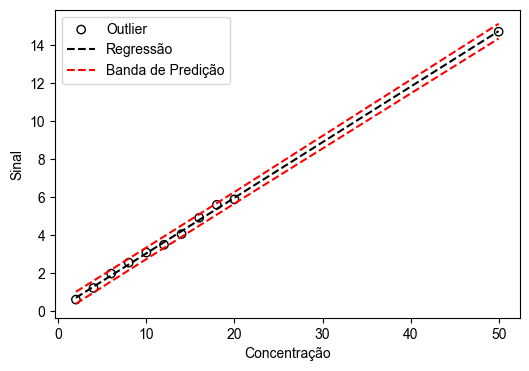

In [86]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os valores experimentais (do df original)
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
# adicionando a linha de regressão (df pred)
plt.plot(df_pred[nome_conc], df_pred['ypred'], label="Regressão", c='k', ls='--')
# adicionando banda de predição inferior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Inferior'], c='r', ls='--', label="Banda de Predição")
# adicionando banda de predição superior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Superior'], c='r', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

### Gráfico da curva de calibração

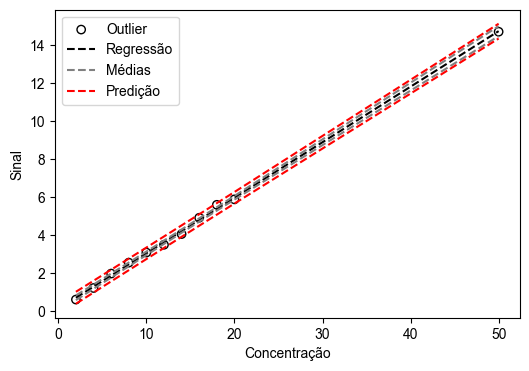

In [87]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os valores experimentais (do df original)
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
# adicionando a linha de regressão (df pred)
plt.plot(df_pred[nome_conc], df_pred['ypred'], label="Regressão", c='k', ls='--')
# adicionando banda média inferior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Inferior'], c='gray', ls='--', label="Médias")
# adicionando banda média superior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Superior'], c='gray', ls='--')
# adicionando banda predição inferior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Inferior'], c='r', ls='--', label="Predição")
# adicionando banda predição superior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Superior'], c='r', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

## Predição de uma nova concentração

Invertendo a equação:

$$concentração = \frac{sinal_{interesse} - b_{0}}{b_{1}} \pm t_{gl_{erros}, \; 1-\alpha/2} \times s_{c}$$

onde:
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;
- $t_{gl_{erros}, \; 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;
- $s_{c}$ é o desvio padrão da concentração, que é estimado da seguinte forma:
- $sinal_{interesse}$ é o sinal para predizar a concentração;

$$s_{c} = \frac{\sqrt{MSQE}}{|b_{1}|} \sqrt{\frac{1}{m} + \frac{1}{n} + \frac{\left( sinal_{interesse} - \overline{sinal} \right)^{2}}{b_{1}^{2}S_{xx}} }$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração do modelo;
- $n$ é o número total de observações utilizada para obter os parâmetros do modelo;
- $m$ é o número de repetições obtidos para $sinal_{interesse}$;
- $\overline{sinal}$ é a média dos sinais utilizado para obter os parâmetros do modelo;
- $sinal_{interesse}$ é o sinal para predizar a concentração;
- $b_{1}$ é o coeficiente angular;

In [88]:
df_pred_inv = df[[nome_conc, nome_sinal]].copy()
df_pred_inv['ypred'] = (df_pred_inv[nome_sinal] - b0)/b1
df_pred_inv['s_predicao'] = (np.sqrt(MSQE)/np.abs(b1))*np.sqrt(1 + 1/df_pred_inv.shape[0] + np.square(df_pred_inv[nome_sinal] - df_pred_inv[nome_sinal].mean())/(np.square(b1)*Sxx))
df_pred_inv['ic_predicao'] = df_pred_inv['s_predicao']*t_critico
df_pred_inv['ic_predicao inferior'] = df_pred_inv['ypred'] - df_pred_inv['ic_predicao']
df_pred_inv['ic_predicao superior'] = df_pred_inv['ypred'] + df_pred_inv['ic_predicao']
df_pred_inv

,Concentração,Sinal,ypred,s_predicao,ic_predicao,ic_predicao inferior,ic_predicao superior
0,2,0.593057,1.674024,0.475287,1.075174,0.598850,2.749199
1,4,1.203115,3.757746,0.469492,1.062065,2.695680,4.819811
2,6,1.964288,6.357617,0.463621,1.048783,5.308834,7.406401
3,8,2.540861,8.326967,0.460210,1.041068,7.285899,9.368035
4,10,3.071079,10.137986,0.457882,1.035802,9.102184,11.173789
5,12,3.481384,11.539428,0.456621,1.032948,10.506480,12.572376
6,14,4.045735,13.467032,0.455662,1.030780,12.436252,14.497812
7,16,4.904917,16.401665,0.455940,1.031409,15.370256,17.433074
8,18,5.588038,18.734941,0.457655,1.035288,17.699653,19.770228
9,20,5.873677,19.710572,0.458761,1.037790,18.672782,20.748362


### Gráfico de predição

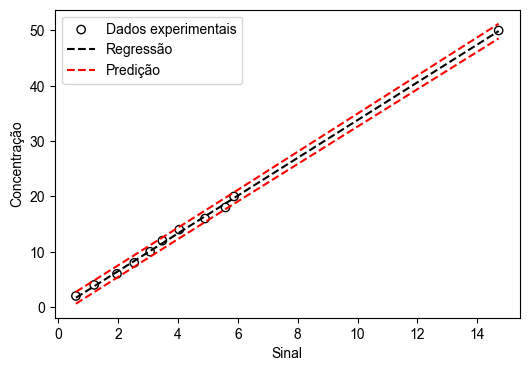

In [89]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os dados experimentais
plt.scatter(df[nome_sinal], df[nome_conc], label="Dados experimentais", edgecolors='k', facecolor='None')

# adicionando a linha de regressão
plt.plot(df_pred_inv[nome_sinal], df_pred_inv['ypred'], label="Regressão", c='k', ls='--')

# adicionando a banda de predição
plt.plot(df_pred_inv[nome_sinal], df_pred_inv['ic_predicao inferior'], label='Predição', c='r', ls='--')
plt.plot(df_pred_inv[nome_sinal], df_pred_inv['ic_predicao superior'], c='r', ls='--')

plt.legend()
plt.xlabel(nome_sinal)
plt.ylabel(nome_conc)
plt.show()